<a href="https://colab.research.google.com/github/paolo0o0/Orders/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%9C_%D0%A2%D0%B5%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестовое задание М.Тех
**Data Science**


Импортируем необходимые библиотеки, загрузим данные из csv файла и посмотрим на них

In [810]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

data = pd.read_csv('М.Тех_Данные_к_ТЗ_DS.csv', encoding='cp1251')
names = data.columns.str.split(',').tolist()
data = data.iloc[:,0].str.split(',', expand=True)
data.columns = names
data.head()

,Количество больничных дней,"""Возраст""","""Пол"""
0,5,39,"""Ж"""
1,4,54,"""М"""
2,4,26,"""М"""
3,5,42,"""М"""
4,4,29,"""М"""


Уберём лишние кавычки из данных

In [811]:
names = names[0]
for i in range(data.shape[1]):
    names[i] = names[i].replace('"','')
data.columns = names
for i, col in enumerate(data.columns):
    data.iloc[:, i] = data.iloc[:, i].str.replace('"', '')
data.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [812]:
data.shape

(237, 3)

In [813]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    object
 1   Возраст                     237 non-null    object
 2   Пол                         237 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB


Проверка пропущенных значений

In [814]:
data.isnull().sum()

Количество больничных дней    0
Возраст                       0
Пол                           0
dtype: int64

In [815]:
for column in data.columns[:-1]:
    data[column] = data[column].astype('int64')
data['Пол'] = data['Пол'].astype('string')

In [816]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    string
dtypes: int64(2), string(1)
memory usage: 5.7 KB


In [817]:
data[data.duplicated(keep='last')].shape

(72, 3)

Создадим новый признак, который будет отвечать на вопрос: пропустил ли данный сотрудник более workdays дней в году по болезни

In [818]:
workdays = 2
data['Более workdays пропусков'] = (data['Количество больничных дней'] >
                                    workdays).astype(int)
data.head()

,Количество больничных дней,Возраст,Пол,Более workdays пропусков
0,5,39,Ж,1
1,4,54,М,1
2,4,26,М,1
3,5,42,М,1
4,4,29,М,1


**Проверим первую гипотезу: мужчины пропускают в течение года более workdays рабочих дней по болезни значимо чаще женщин**

Преобразуем категориальную переменную "Пол" в числовой формат и разделим данные по полу на две группы

In [819]:
data['Пол'] = data['Пол'].map({'М': 1, 'Ж': 0})
male_data = data[data['Пол'] == 1]
female_data = data[data['Пол'] == 0]
male_data.shape, female_data.shape

((139, 4), (98, 4))

1. **Сформулируем нулевую и альтернативную гипотезы**:
   - Нулевая гипотеза (H0) "доли или частоты в двух выборках равны".
   - Альтернативная гипотеза (H1) звучит так: мужчины в течение год пропускают по болезни значимо женщин."Доля успешных событий в группе мужчин больше доли в группе женщин". Будем считать успешным событие, когда у конкретного человека в году более workdays пропусков по болезни.

2. **Соберём данные и посчитаем необходимые параметры**:
   - В каждой из двух выборок подсчитаем количество "успехов".
   - Также вычисли доли успешных и неуспешных событий в каждой выборке.

3. **Проведём тест**:
   - Используем функцию proportions_ztest из библиотеки scipy для проведения двухвыборочного биномиального теста. Эта функция вычисляет z-статистику и p-значение для теста разности долей.

4. **Принять решение на основе результатов**:
   - Если p-значение меньше уровня значимости, возьмём его равным 0.05, ты можно отклонить нулевую гипотезу в пользу альтернативной.

В каждой группе посчитаем количество людей, у которых в году более workdays пропусков.

In [820]:
male_data['Более workdays пропусков'].sum(), female_data[
    'Более workdays пропусков'].sum()

(84, 67)

Будем считать успешным событие, когда количество пропусков в году для конкретного человека > workdays. Построим гистограммы, которые отражают, соотношение "успехов" и "неудач" людей в обеих группах.


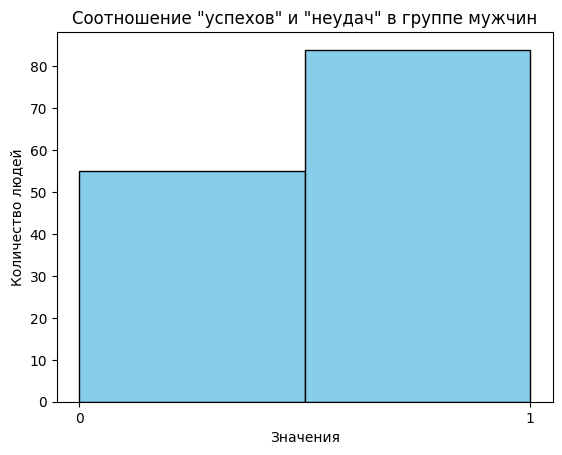

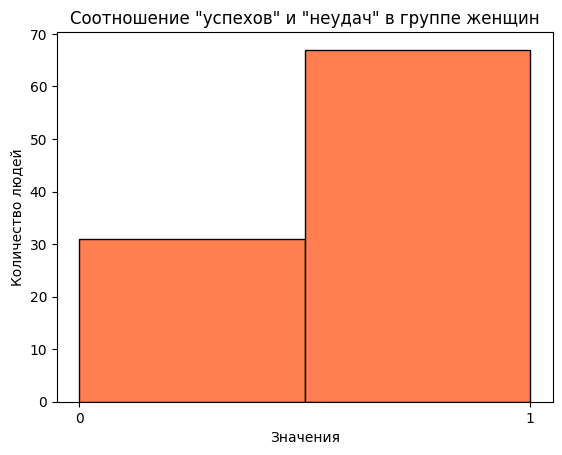

In [821]:
plt.hist(male_data['Более workdays пропусков'], bins=2, color='skyblue',
         edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество людей')
plt.title('Соотношение "успехов" и "неудач" в группе мужчин')
plt.xticks([0, 1])
plt.show()

plt.hist(female_data['Более workdays пропусков'], bins=2, color='coral',
         edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество людей')
plt.title('Соотношение "успехов" и "неудач" в группе женщин')
plt.xticks([0, 1])
plt.show()

Посмотрим на средние значения количества пропусков в год для каждой группы

In [822]:
male_data['Количество больничных дней'].mean(), female_data[
    'Количество больничных дней'].mean()

(3.179856115107914, 3.36734693877551)

In [823]:
male_data.head()

,Количество больничных дней,Возраст,Пол,Более workdays пропусков
1,4,54,1,1
2,4,26,1,1
3,5,42,1,1
4,4,29,1,1
5,4,38,1,1


Вычислим среднее значение по столбцу 'Более workdays пропусков' в каждой группе, получим доли успешных событий

In [824]:
p1 = male_data['Более workdays пропусков'].mean()
p2 =  female_data['Более workdays пропусков'].mean()

Построим диаграмму, показывающую разность между долями в двух выборках, а также доверительные интервалы для этих разностей


   Вычислим стандартную ошибку разности долей
   \begin{aligned}
       SE(\hat{p}_1 - \hat{p}_2) = \sqrt{\hat{p}(1 - \hat{p}) \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}
   \end{aligned}

   где  $\hat{p}$  - комбинированная доля успешных событий,  $n_1$  и  $n_2$ - размеры выборок.

Доверительный интервал для разности долей выглядит следующим образом:
\begin{aligned}
 (\hat{p}_1 - \hat{p}_2) \pm z \cdot SE(\hat{p}_1 - \hat{p}_2)
\end{aligned}
   где $z$ - критическое значение стандартного нормального распределения (Возьмём 1.96 для уровня доверия 95%).

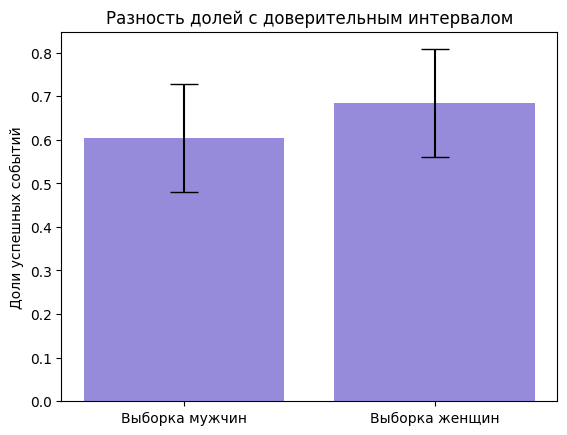

In [825]:
z = 1.96
p = data['Более workdays пропусков'].mean()
SE = np.sqrt(p * (1 - p) * (1 / male_data.shape[0] + 1 / female_data.shape[0]))
conf_int = z * SE
difference = p1 - p2

x = np.arange(2)
y = [p1, p2]
yerr = [conf_int, conf_int]

plt.bar(x, y, yerr=yerr, align='center', alpha=0.7, ecolor='black', capsize=10,
        color='slateblue')
plt.ylabel('Доли успешных событий')
plt.title('Разность долей с доверительным интервалом')
plt.xticks(x, ['Выборка мужчин', 'Выборка женщин'])
plt.show()




Построим столбчатую диаграмму, на которой будут представлены доли успешных событий.

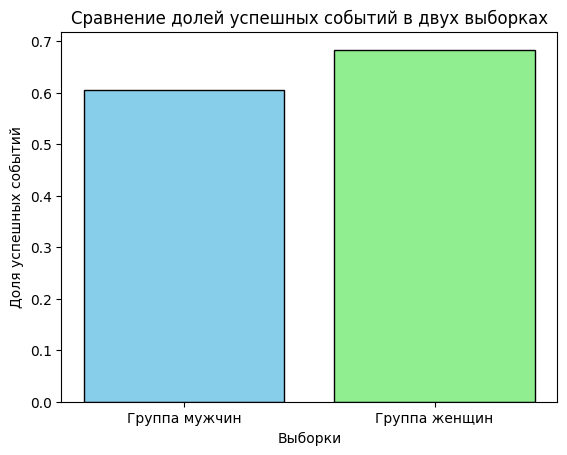

In [826]:
labels = ['Группа мужчин', 'Группа женщин']
success_rates = [male_data['Более workdays пропусков'].mean(), female_data[
    'Более workdays пропусков'].mean()]

plt.bar(labels, success_rates, color=['skyblue', 'lightgreen'],
        edgecolor='black')
plt.xlabel('Выборки')
plt.ylabel('Доля успешных событий')
plt.title('Сравнение долей успешных событий в двух выборках')
plt.show()

 z-статистика может быть рассчитана следующим образом:
\begin{aligned}
     z = \frac{(p1 - p2)}{\sqrt{p*(1 - p)*(1/n1 + 1/n2)}}
\end{aligned}

где $p_{1}$ и $p_{2}$ - доли успешных событий в выборках 1 и 2, $n_{1}$ и $n_{2}$ - размеры выборок, $p$- комбинированная доля успешных событий.

In [827]:
male_share = male_data['Более workdays пропусков'].mean()
female_share = female_data['Более workdays пропусков'].mean()
general_share = data['Более workdays пропусков'].mean()

z_stat = (male_share - female_share) / np.sqrt(general_share *
 (1 - general_share) * (1/male_data.shape[0] + 1/female_data.shape[0]))
print(z_stat)

-1.2512431983794325


Итак, мы получили значение z-статистики = 1.1931694394416685. Согласно калькулятору z-score to p-value, значение p-value составляет 0.1164015707

Для проведения двухвыборочного биномиального теста можно также воспользоваться *функцией* proportions_ztest из библиотеки scipy

In [828]:
male_successes = male_data['Более workdays пропусков'].sum()
female_successes = female_data['Более workdays пропусков'].sum()

successes = np.array([male_successes, female_successes])
trials = np.array([male_data.shape[0], female_data.shape[0]])

# Проведение теста
z_stat, p_value = proportions_ztest(successes, trials, alternative='larger')
print(f"Z-статистика: {z_stat}, p-значение: {p_value}")

if p_value > 0.05:
    print("Альтернативная гипотеза отвергнута")

Z-статистика: -1.2512431983794325, p-значение: 0.8945771189806193
Альтернативная гипотеза отвергнута


p-value оказалось больше уровня значимости, значит, гипотеза опровергнута.




**Теперь проверим следующую гипотезу: работники старше age лет пропускают в течение года более workdays дней по болезни значимо чаще своих более молодых коллег**

Разделим исходную выборку на две группы: людей, старше age лет, и людей моложе age лет.

In [829]:
age = 35
young_data = data[data['Возраст'] <= age]
old_data = data[data['Возраст'] > age]
young_data.shape, old_data.shape

((57, 4), (180, 4))

Аналогично проверке первой гипотезы, будем считать успешным событие, когда у конкретного человека из нашей выборки в году более workdays пропусков по болезни.

Построим гистограммы, которые отражают, соотношение "успехов" и "неудач" людей в обеих возрастных группах.

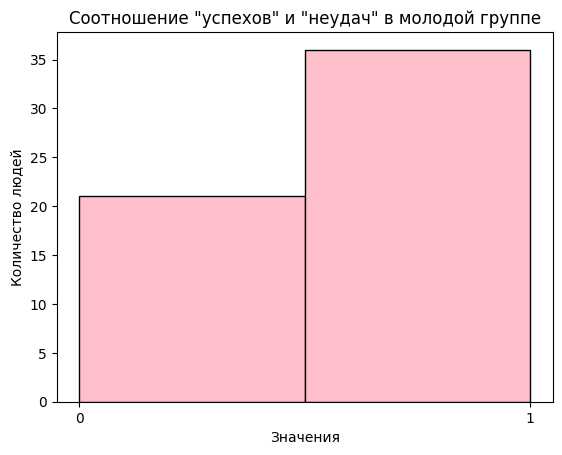

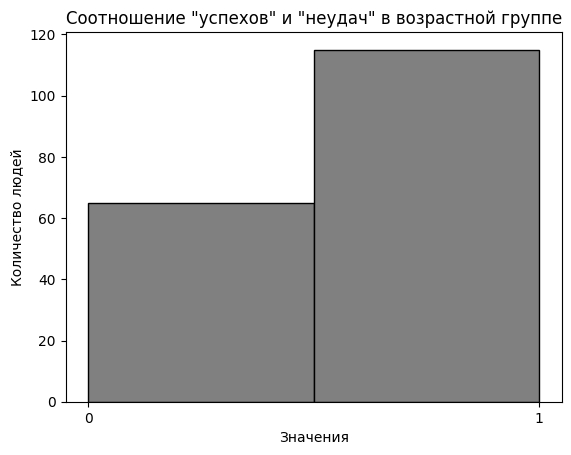

In [830]:
plt.hist(young_data['Более workdays пропусков'], bins=2, color='pink',
         edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество людей')
plt.title('Соотношение "успехов" и "неудач" в молодой группе')
plt.xticks([0, 1])
plt.show()

plt.hist(old_data['Более workdays пропусков'], bins=2, color='grey',
         edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество людей')
plt.title('Соотношение "успехов" и "неудач" в возрастной группе')
plt.xticks([0, 1])
plt.show()

In [831]:
old_data.head()

,Количество больничных дней,Возраст,Пол,Более workdays пропусков
0,5,39,0,1
1,4,54,1,1
3,5,42,1,1
5,4,38,1,1
6,1,49,0,0


Построим диаграмму, показывающую разность между долями в двух выборках, а также доверительные интервалы для этих разностей

In [832]:
p1 = old_data['Более workdays пропусков'].mean()
p2 = young_data['Более workdays пропусков'].mean()
p1, p2

(0.6388888888888888, 0.631578947368421)

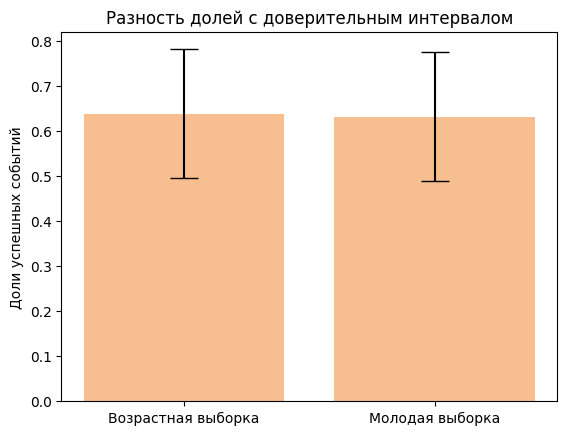

In [833]:
z = 1.96
p = data['Более workdays пропусков'].mean()
SE = np.sqrt(p * (1 - p) * (1 / young_data.shape[0] + 1 / old_data.shape[0]))
conf_int = z * SE
difference = p1 - p2

x = np.arange(2)
y = [p1, p2]
yerr = [conf_int, conf_int]

plt.bar(x, y, yerr=yerr, align='center', alpha=0.7, ecolor='black', capsize=10,
        color='sandybrown')
plt.ylabel('Доли успешных событий')
plt.title('Разность долей с доверительным интервалом')
plt.xticks(x, ['Возрастная выборка', 'Молодая выборка'])
plt.show()

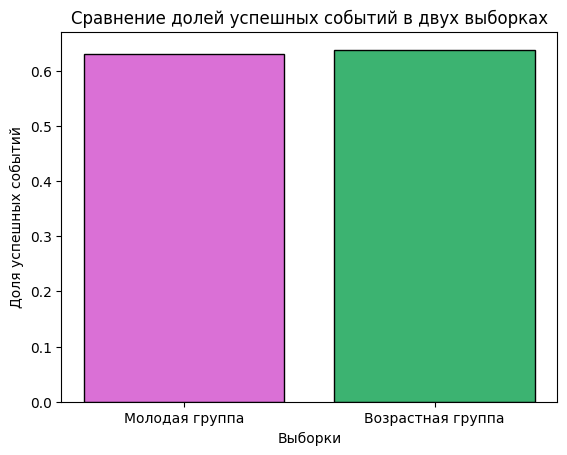

In [834]:
labels = ['Молодая группа', 'Возрастная группа']
success_rates = [young_data['Более workdays пропусков'].mean(), old_data[
    'Более workdays пропусков'].mean()]

plt.bar(labels, success_rates, color=['orchid', 'mediumseagreen'],
        edgecolor='black')
plt.xlabel('Выборки')
plt.ylabel('Доля успешных событий')
plt.title('Сравнение долей успешных событий в двух выборках')
plt.show()

Для проведения двухвыборочного биномиального теста воспользуемся функцией proportions_ztest из библиотеки scipy

In [835]:
old_successes = old_data['Более workdays пропусков'].sum()
young_successes = young_data['Более workdays пропусков'].sum()

successes = np.array([old_successes, young_successes])
trials = np.array([old_data.shape[0], young_data.shape[0]])

# Проведение теста
z_stat, p_value = proportions_ztest(successes, trials, alternative='larger')
print(f"Z-статистика: {z_stat}, p-значение: {p_value}")

if p_value > 0.05:
    print("Альтернативная гипотеза отвергнута")

Z-статистика: 0.10002856920035127, p-значение: 0.46016082212231335
Альтернативная гипотеза отвергнута


Проведя проверку двух гипотез, у нас нет достаточных доказательств, чтобы считать различия между группами статистически значимыми. Мы не можем считать, что доли в выборках действительно различаются. То есть, мы не можем утверждать, что выбранные группы имеют различные доли успешных событий. Это означает, что любые наблюдаемые различия могут быть результатом случайности или незначительных колебаний. Отсутствие статистической значимости не обязательно означает отсутствие реальных различий. Это может быть вызвано, например, недостаточным размером выборки.